In [1]:
from pyquil import Program, get_qc
from pyquil.gates import *
from pyquil.api import WavefunctionSimulator

In [2]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [3]:
max_depth = 20
shot_count = 1

def getPyQuilSimulator():
    return get_qc("20q-qvm")

def entangler(program,n):
    for i in range(n-1):
        program += RX(3,i+1).controlled(i)

def entanglerReverse(program,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            program += RX(np.pi/7,target).controlled(i)

def entanglerCX(program,n):
    for i in range(n-1):
        program += CNOT(i,i+1)

def entanglerReverseCX(program,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            program += CNOT(i,target)

def Rx(program,n):
    for i in range(n):
        program += RX(np.pi/3,i)

def Ry(program,n):
    for i in range(n):
        program += RY(np.pi/5,i)

def XY(program,n):
    for i in range(n):
        program += X(i)
        program += Y(i)

In [4]:
def test(i,j):
    p=Program()
    ro = p.declare('ro', 'BIT', i)
    for k in range(j):
        Rx(p,i)
        entangler(p,i)
        Ry(p,i)
        entanglerReverse(p,i)
    for m in range(i):
        p += MEASURE(m, ro[m])
    return p

In [5]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(2,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_p=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_p)
            aa = a.get('0',0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [6]:
i=3
j=3
p=test(i,j)
print(p)

DECLARE ro BIT[3]
RX(pi/3) 0
RX(pi/3) 1
RX(pi/3) 2
CONTROLLED RX(3) 0 1
CONTROLLED RX(3) 1 2
RY(pi/5) 0
RY(pi/5) 1
RY(pi/5) 2
CONTROLLED RX(pi/7) 0 2
CONTROLLED RX(pi/7) 2 0
RX(pi/3) 0
RX(pi/3) 1
RX(pi/3) 2
CONTROLLED RX(3) 0 1
CONTROLLED RX(3) 1 2
RY(pi/5) 0
RY(pi/5) 1
RY(pi/5) 2
CONTROLLED RX(pi/7) 0 2
CONTROLLED RX(pi/7) 2 0
RX(pi/3) 0
RX(pi/3) 1
RX(pi/3) 2
CONTROLLED RX(3) 0 1
CONTROLLED RX(3) 1 2
RY(pi/5) 0
RY(pi/5) 1
RY(pi/5) 2
CONTROLLED RX(pi/7) 0 2
CONTROLLED RX(pi/7) 2 0
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]



In [7]:
from py_moara import MoaraSimulator
simulator2 = MoaraSimulator()
result2 = simulator2.run(p, 1024)
print(result2)

{'100': 58, '001': 228, '101': 61, '010': 127, '011': 89, '000': 117, '111': 212, '110': 132}


In [8]:

wf_sim = WavefunctionSimulator()

def exec_func(sim, program):
    #return sim.run(program)
    return wf_sim.wavefunction(program).get_outcome_probs()

#simulator = getPyQuilSimulator()
depth=bench(wf_sim, max_depth, exec_func)
print(depth)

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000213A809CCC8>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /qvm
WARNING - Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000213A8107C08>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it')': /qvm
WARNING - Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000213A8121988>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine act

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /qvm (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000213A8126688>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

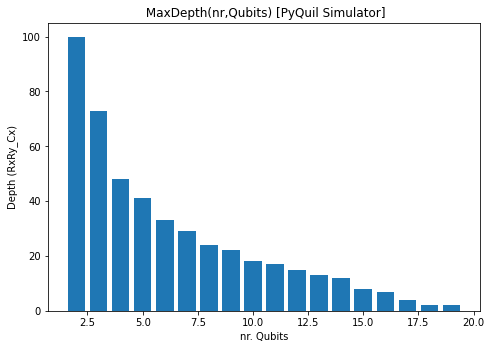

In [124]:
simulator_name='PyQuil Simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [9]:
def exec_func(sim, circ):
    return sim.run(circ,1)
    
from py_moara import MoaraSimulator
simulator2 = MoaraSimulator()
depth=bench(simulator2,max_depth, exec_func)
print(depth)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 55, 27, 13, 6]


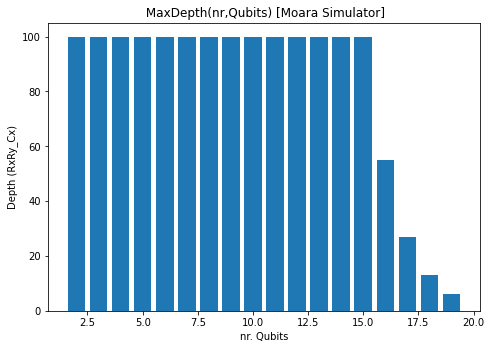

In [10]:
simulator_name='Moara Simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [83]:
[3,2][-1]

2